In [1]:
import numpy as np
import tensorflow as tf
import keras

/home/harshit/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [5]:
from keras.layers import Dense,Input
from keras.models import Model
from keras.datasets import mnist

In [6]:
input_size = Input(shape=(784,)) 

In [7]:
encoding_size = 32

In [8]:
encoding = Dense(encoding_size, activation = 'relu')(input_size)

In [9]:
decoding = Dense(784, activation= 'sigmoid')(encoding)

In [11]:
encoder= Model(input_size,encoding)
autoencoder = Model(input_size, decoding)

In [12]:
encoded_input = Input(shape=(encoding_size,))
decoder_layer= autoencoder.layers[-1]
decoder= Model(encoded_input,decoder_layer(encoded_input))

In [13]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

In [14]:
(x_train,_),(x_test,_)= mnist.load_data()

In [15]:
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train/=255
x_test/=255

In [16]:
x_train= x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test= x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [17]:
print(x_train.shape)

(60000, 784)


In [18]:
print(x_test.shape)

(10000, 784)


In [20]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 182us/step - loss: 0.3678 - val_loss: 0.2714
Epoch 2/50
60000/60000 [==============================] - 10s 173us/step - loss: 0.2635 - val_loss: 0.2522
Epoch 3/50
60000/60000 [==============================] - 11s 175us/step - loss: 0.2420 - val_loss: 0.2302
Epoch 4/50
60000/60000 [==============================] - 11s 182us/step - loss: 0.2228 - val_loss: 0.2132
Epoch 5/50
60000/60000 [==============================] - 11s 177us/step - loss: 0.2081 - val_loss: 0.2004
Epoch 6/50
60000/60000 [==============================] - 11s 178us/step - loss: 0.1967 - val_loss: 0.1904
Epoch 7/50
60000/60000 [==============================] - 10s 170us/step - loss: 0.1878 - val_loss: 0.1825
Epoch 8/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1806 - val_loss: 0.1758
Epoch 9/50
60000/60000 [==============================] - 9s 153us/step - loss: 0.1744 - val_lo

In [21]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)

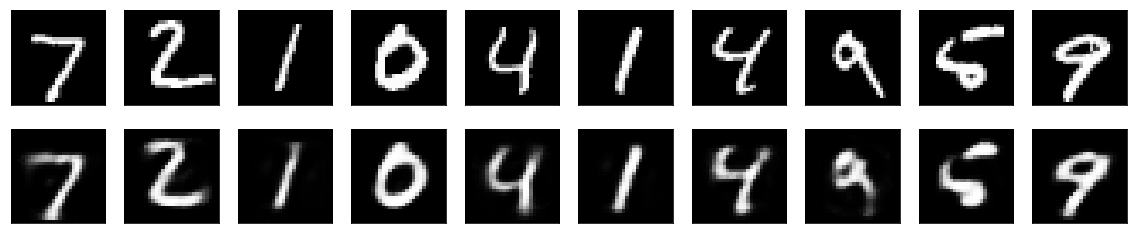

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for i in range(10):
    sub= plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    sub.get_xaxis().set_visible(False)
    sub.get_yaxis().set_visible(False)
    sub= plt.subplot(2,10,i+1+10)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.gray()
    sub.get_xaxis().set_visible(False)
    sub.get_yaxis().set_visible(False)
    
plt.show()    